In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the data

Data=pd.read_csv("newallcustdata.csv")

C:\Users\PRANEETH\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8357042 entries, 0 to 8357041
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   UserID      int64  
 2   ECG         float64
 3   PPG         object 
dtypes: float64(1), int64(2), object(1)
memory usage: 255.0+ MB


In [6]:
# converting the PPG to Float datatype

Data['PPG']=Data['PPG'].astype('float64')

Data=Data.iloc[:,1:]
Data

,UserID,ECG,PPG
0,1,-0.121753,-0.025703
1,1,-0.123190,-0.025228
2,1,-0.124468,-0.024707
3,1,-0.124362,-0.023996
4,1,-0.121151,-0.022986
...,...,...,...
8357037,166,0.257240,-0.050257
8357038,166,0.251080,-0.047375
8357039,166,0.252978,-0.043417
8357040,166,0.251976,-0.038478


In [7]:
# droping the null values

Data=Data.dropna()

Data.shape

(8356685, 3)

In [8]:
Data.head()

,UserID,ECG,PPG
0,1,-0.121753,-0.025703
1,1,-0.123190,-0.025228
2,1,-0.124468,-0.024707
3,1,-0.124362,-0.023996
4,1,-0.121151,-0.022986


### Systolic and Diastolic Pressure

In [9]:
# importing Systolic and Diastolic BPs for the users

S_D_BP=pd.read_csv("BP_Data.csv")
S_D_BP=S_D_BP.iloc[:,1:]

In [10]:
# considering only SBP values for this training

SBP=S_D_BP['SBP']
SBP=pd.DataFrame(SBP)
SBP['UserID']=np.arange(1,167)

SBP=SBP[['UserID','SBP']]
SBP

,UserID,SBP
0,1,94
1,2,94
2,3,97
3,4,97
4,5,98
...,...,...
161,162,166
162,163,170
163,164,174
164,165,175


In [11]:
Totaldata=pd.DataFrame()
for i in range(1,167):
    data=Data[Data['UserID']==i]
    if data.iloc[0,2]==0:
        data=data.loc[data['PPG'].ne(0).idxmax():,:]
#     print('UserID {0} has shape equal to {1} '.format(i,data.shape))
    data['SBP']=S_D_BP.SBP[i-1]
    data['DBP']=S_D_BP.DBP[i-1]
    Totaldata=Totaldata.append(data)
    del data

<ipython-input-11-edcb123a3618>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SBP']=S_D_BP.SBP[i-1]
<ipython-input-11-edcb123a3618>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DBP']=S_D_BP.DBP[i-1]
<ipython-input-11-edcb123a3618>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

<ipython-input-11-edcb123a3618>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SBP']=S_D_BP.SBP[i-1]
<ipython-input-11-edcb123a3618>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DBP']=S_D_BP.DBP[i-1]


In [12]:
Totaldata.describe()

,UserID,ECG,PPG,SBP,DBP
count,8.155267e+06,8.155267e+06,8.155267e+06,8.155267e+06,8.155267e+06
mean,8.157833e+01,2.713939e-03,-6.904528e-02,1.277742e+02,7.740498e+01
std,4.706871e+01,6.630926e-01,1.454684e+01,1.438482e+01,8.757271e+00
min,1.000000e+00,-4.274722e+01,-4.763703e+03,9.400000e+01,5.100000e+01
25%,4.100000e+01,-7.981320e-02,-1.160523e-02,1.180000e+02,7.300000e+01
50%,8.200000e+01,-3.007494e-02,-7.027700e-04,1.280000e+02,7.800000e+01
75%,1.210000e+02,3.167389e-02,1.129915e-02,1.340000e+02,8.300000e+01
max,1.660000e+02,5.582503e+01,1.193040e+03,1.770000e+02,9.800000e+01


In [13]:
Totaldata=Totaldata.reset_index(drop=True)
Totaldata

,UserID,ECG,PPG,SBP,DBP
0,1,-0.121753,-0.025703,94,51
1,1,-0.123190,-0.025228,94,51
2,1,-0.124468,-0.024707,94,51
3,1,-0.124362,-0.023996,94,51
4,1,-0.121151,-0.022986,94,51
...,...,...,...,...,...
8155262,166,0.257240,-0.050257,177,98
8155263,166,0.251080,-0.047375,177,98
8155264,166,0.252978,-0.043417,177,98
8155265,166,0.251976,-0.038478,177,98


In [14]:
# checking the frequencies of the SBP values

Freq_SBP=pd.DataFrame(S_D_BP['SBP'].value_counts()).reset_index()
Freq_SBP.rename(columns = {'index':'SBP_values','SBP':'Frequencies'}, inplace = True)
Freq_SBP.head()

,SBP_values,Frequencies
0,122,10
1,118,10
2,130,9
3,129,8
4,134,7


### Checking for the distribution of the SBP

In [15]:
import matplotlib.pyplot as plt

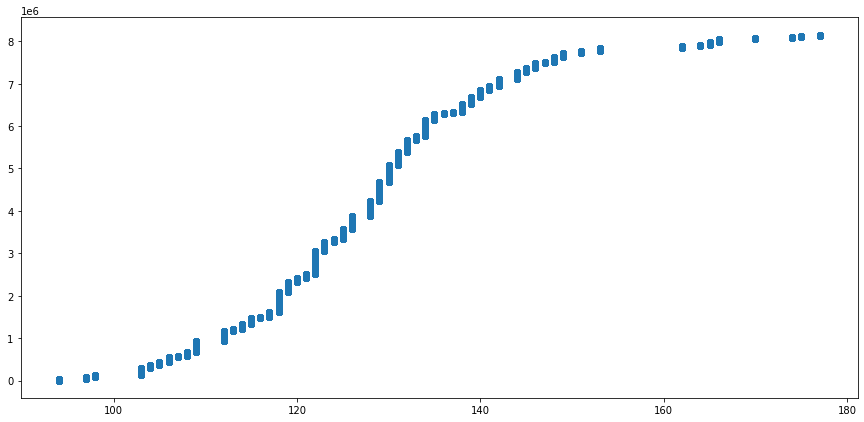

In [16]:
fig=plt.figure(figsize=(15,7))
plt.scatter(Totaldata['SBP'],np.arange(len(Totaldata['SBP'])))

### To solve the class imbalance, duplicating is done on Users who's SBP values are less than 10.

In [17]:
Dict_1={'SBP':[],'Dupli_toprepare':[]}
for i in range(len(Freq_SBP)):
    if Freq_SBP.Frequencies[i]<10:
        Dict_1['SBP'].append(Freq_SBP.SBP_values[i])
        Dict_1['Dupli_toprepare'].append(10-Freq_SBP.Frequencies[i])
duplicates=pd.DataFrame(Dict_1)
duplicates.head()

,SBP,Dupli_toprepare
0,130,1
1,129,2
2,134,3
3,128,3
4,131,4


In [18]:
newdf=pd.DataFrame()
for i in range(len(duplicates)):
    user = SBP.loc[SBP['SBP']==duplicates.SBP[i],'UserID'].iloc[0]
    data = Totaldata[Totaldata['UserID']==user]
    newdf=newdf.append(pd.DataFrame(np.repeat(data.values, duplicates.Dupli_toprepare[i] , axis=0)))

In [19]:
newdf.columns=Totaldata.columns
newdf

,UserID,ECG,PPG,SBP,DBP
0,93.0,1.261769,-0.012013,130.0,80.0
1,93.0,1.469563,-0.011300,130.0,80.0
2,93.0,1.335978,-0.010494,130.0,80.0
3,93.0,0.921083,-0.009599,130.0,80.0
4,93.0,0.462865,-0.008627,130.0,80.0
...,...,...,...,...,...
221503,166.0,0.253220,-0.032678,177.0,98.0
221504,166.0,0.253220,-0.032678,177.0,98.0
221505,166.0,0.253220,-0.032678,177.0,98.0
221506,166.0,0.253220,-0.032678,177.0,98.0


In [20]:
# Concatinate the 2 dataframes

BalancedData = pd.concat([Totaldata,newdf],axis=0)
BalancedData

,UserID,ECG,PPG,SBP,DBP
0,1.0,-0.121753,-0.025703,94.0,51.0
1,1.0,-0.123190,-0.025228,94.0,51.0
2,1.0,-0.124468,-0.024707,94.0,51.0
3,1.0,-0.124362,-0.023996,94.0,51.0
4,1.0,-0.121151,-0.022986,94.0,51.0
...,...,...,...,...,...
221503,166.0,0.253220,-0.032678,177.0,98.0
221504,166.0,0.253220,-0.032678,177.0,98.0
221505,166.0,0.253220,-0.032678,177.0,98.0
221506,166.0,0.253220,-0.032678,177.0,98.0


#### Splitting the data based on UserID

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_ids,test_ids=train_test_split(np.arange(1,167),random_state=11)
print(train_ids)
print(test_ids)

[102  64 132  55  95  65 106  52 125  78  13 112  61  54  17  50   1 109
 139  74 136  62  94 148   6  99 124  59   7 161 145  22  36  89 149  86
  63 128  21  66  58 162  29   5  32  98  40 121 140 114 159  51  85 118
 122 152  76  96 129  34 123 142  41 134 120  48  11  49  19  44  18  60
  39  91  26  20  79  33 143  73  69 147  88   9   4 113   2 160 135 151
   8  45  28 108  90 144  24  97  80 166 115  71  68 164 163  38  75 130
 141  35 133 126  46  93 110  25  83  72  77  14  82  92  81 154]
[ 27  70 127  23 131  43 156 119  42  57 104 101 105  67  87 138  30  56
 157 165 146  47 117  53 116  84 153  10  37 155 103  12 158 107  16  31
 111 137 100   3  15 150]


#### Creating overlapping windows across all the participants

In [23]:
def window_data(participants_list,Data,n_skip,stride):
#defining an empty list
    windows =[]
    X = []
    y = []
    uid =[]
    uid1 =[]
    X1 = []
    y1 = []
    X2 = []
# defining the terms
    cycle_length=100
    cycles_per_window=30
    window_size=cycles_per_window*cycle_length
    
    for i in participants_list:
        data=Data[Data['UserID']==i]
        data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
        data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
        data['Simple_MA_PPG_85'] = data['PPG'].rolling(window=85).mean()
        data['Simple_MA_PPG_85']=data['Simple_MA_PPG_85'].bfill()
        data=data[['UserID','ECG','PPG','Simple_MA_ECG_85','Simple_MA_PPG_85','SBP','DBP']]
        for j in range(n_skip,len(data)+1,n_skip):
            windows.append(data[j-n_skip:j-n_skip+window_size])
            X.append(data.iloc[j-n_skip:j-n_skip+window_size,1:5])
            y.append(np.repeat(data.iloc[1,5],1))
            uid.append(np.repeat(data.iloc[1,0],1))
    for k in X:
        X1.append(k[::stride])
    for m,n in enumerate(X1):
        if len(n)==window_size/stride:
            X2.append(X1[m])
            y1.append(y[m])
            uid1.append(uid[m])
    
    # converting X into array
    X2 = np.asarray(X2).astype('float32')
    y1 = np.asarray(y1).astype('float32')
    uid1 = np.asarray(uid1).astype('float32')
    return X2,y1,uid1

In [24]:
X_train,y_train,userid_train=window_data(train_ids,BalancedData,250,2)

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_PPG_85']=data['Simple_MA_PPG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_PPG_85'] = data['PPG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_PPG_85'] = data['PPG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [25]:
X_test,y_test,userid_test=window_data(test_ids,BalancedData,250,2)

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_PPG_85'] = data['PPG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<ipython-input-23-298f9cc8de3d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85'] = data['ECG'].rolling(window=85).mean()
<ipython-input-23-298f9cc8de3d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Simple_MA_ECG_85']=data['Simple_MA_ECG_85'].bfill()
<ipython-input-23-298f9cc8de3d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [26]:
X_train

array([[[-1.8258832e-01, -4.0131798e-03, -1.5365164e-01, -2.2653624e-04],
        [-2.3029026e-01, -2.8778999e-03, -1.5365164e-01, -2.2653624e-04],
        [-2.3142374e-01, -2.2994999e-03, -1.5365164e-01, -2.2653624e-04],
        ...,
        [-1.2943694e-01,  1.2686460e-02,  3.5458986e-02, -8.2708272e-04],
        [-1.3263667e-01,  1.4285890e-02,  3.3193402e-02, -1.7715235e-04],
        [-1.3520499e-01,  1.5104820e-02,  3.1648654e-02,  4.8234919e-04]],

       [[-2.6047811e-01,  3.9628600e-03, -8.2641989e-02,  2.8903011e-04],
        [-2.0247062e-01,  5.5578100e-03, -8.4072292e-02,  2.4522940e-04],
        [-1.7783719e-01,  7.1509401e-03, -8.1424460e-02,  2.2177541e-04],
        ...,
        [-5.2287150e-02,  9.1558099e-03,  4.9545199e-02, -1.9842656e-03],
        [-8.9102127e-02,  1.0826820e-02,  4.8407555e-02, -1.3525327e-03],
        [ 4.8950881e-02,  1.2510290e-02,  4.9720295e-02, -6.9493928e-04]],

       [[ 1.8046480e-01, -6.0133198e-03,  3.2140154e-02,  1.7850929e-04],
        

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(74513, 1500, 4)
(74513, 1)
(33922, 1500, 4)
(33922, 1)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization, Conv2D,Conv1D, MaxPooling1D ,Flatten, SimpleRNN
from tensorflow.keras.optimizers import Adam,RMSprop

### RNN Model

In [29]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[-1]),activation="relu"))
model.add(SimpleRNN(20,activation="relu",return_sequences=True))
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="linear"))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse',metrics=['mae'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1500, 64)          4416      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1500, 20)          1700      
                                                                 
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 16)                480016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 486,149
Trainable params: 486,149
Non-trai

In [31]:
# fit model
model_history=model.fit(X_train,y_train,epochs=32 ,batch_size=32,validation_split=0.2)

Epoch 1/32
1863/1863 [==============================] - 778s 417ms/step - loss: 872.5170 - mae: 20.5988 - val_loss: 428.4074 - val_mae: 16.8624
Epoch 2/32
1863/1863 [==============================] - 767s 412ms/step - loss: 521.6340 - mae: 17.9807 - val_loss: 308.8751 - val_mae: 12.8412
Epoch 3/32
1863/1863 [==============================] - 767s 411ms/step - loss: 434.4236 - mae: 16.2154 - val_loss: 347.6042 - val_mae: 14.1539
Epoch 4/32
1863/1863 [==============================] - 764s 410ms/step - loss: 429.0449 - mae: 16.2400 - val_loss: 211.1337 - val_mae: 11.6104
Epoch 5/32
1863/1863 [==============================] - 758s 407ms/step - loss: 336.6793 - mae: 14.3356 - val_loss: 184.3476 - val_mae: 10.9628
Epoch 6/32
1863/1863 [==============================] - 752s 403ms/step - loss: 298.3312 - mae: 13.4748 - val_loss: 218.0347 - val_mae: 12.0369
Epoch 7/32
1863/1863 [==============================] - 611s 328ms/step - loss: 291.0009 - mae: 13.2830 - val_loss: 268.5676 - val_mae: 

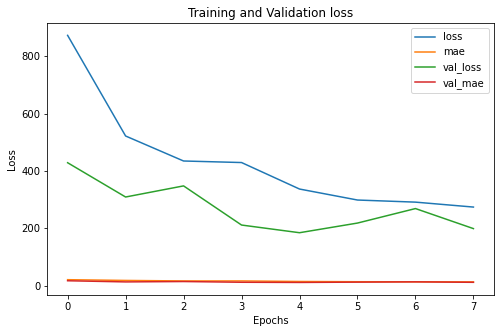

In [32]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

In [33]:
# Predicting the test set results
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

In [34]:
# # predicting from the loaded model
# y_pred=loaded_model.predict(X_test)
# y_train_pred=loaded_model.predict(X_train)

In [47]:
y_pred

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

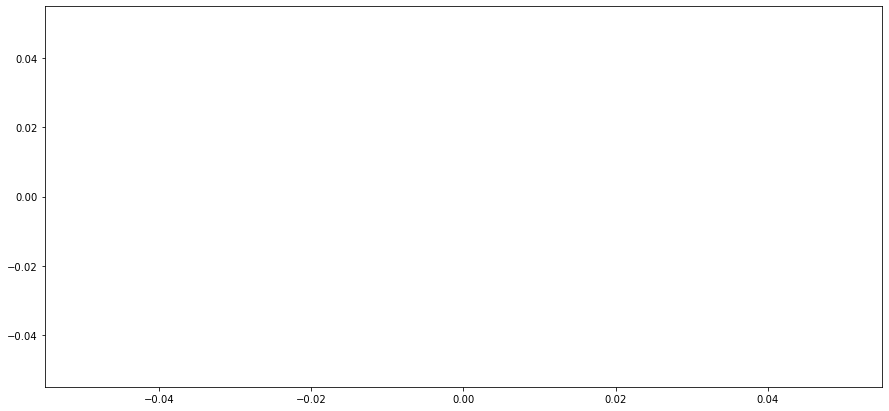

In [46]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,7))
# plt.plot(y_test)
plt.plot(y_pred)

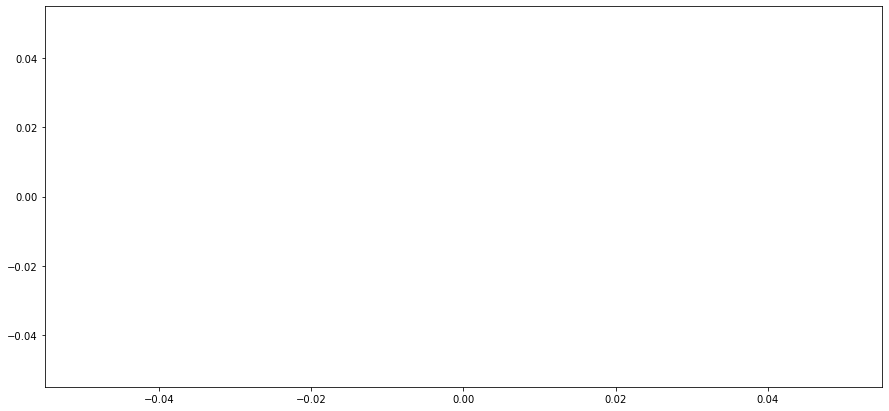

In [36]:
import seaborn as sns
plt.figure(figsize=(15,7))
plt.scatter(y_test,y_pred)

In [37]:
# Windowswise Train pred

pred_df=pd.DataFrame()
pred_df['UserID']=pd.Series(userid_test.flatten(),dtype='int64')
pred_df['y_pred']=pd.Series(y_pred.flatten())
pred_df['y_test']=pd.Series(y_test.flatten())
pred_df['Avg_SBP']=120

# Windowswise Test pred

Train_pred_df=pd.DataFrame()
Train_pred_df['UserID']=pd.Series(userid_train.flatten(),dtype='int64')
Train_pred_df['y_train_pred']=pd.Series(y_train_pred.flatten())
Train_pred_df['y_train']=pd.Series(y_train.flatten())
Train_pred_df['Avg_SBP']=120


#grouping all the user and computing some descriptive stats on them

li=[]
li.append(pred_df.groupby('UserID')['y_test'].mean())
li.append(pred_df.groupby('UserID')['y_pred'].mean())
li.append(pred_df.groupby('UserID')['y_pred'].max())
li.append(pred_df.groupby('UserID')['y_pred'].min())
li.append(pred_df.groupby('UserID')['Avg_SBP'].mean())
TestDF=pd.concat(li,axis=1)
TestDF.columns=['y_test','y_pred_mean','y_pred_max','y_pred_min','Avg_SBP']


li1=[]
li1.append(Train_pred_df.groupby('UserID')['y_train'].mean())
li1.append(Train_pred_df.groupby('UserID')['y_train_pred'].mean())
li1.append(Train_pred_df.groupby('UserID')['y_train_pred'].max())
li1.append(Train_pred_df.groupby('UserID')['y_train_pred'].min())
li1.append(Train_pred_df.groupby('UserID')['Avg_SBP'].mean())
TrainDF=pd.concat(li1,axis=1)
TrainDF.columns=['y_train','y_train_pred_mean','y_train_pred_max','y_train_pred_min','Avg_SBP']



In [38]:
TestDF['MeanDiff'] = TestDF['y_test']-TestDF['y_pred_mean']
TestDF['MinDiff'] = TestDF['y_test']-TestDF['y_pred_min']
TestDF['MaxDiff'] = TestDF['y_test']-TestDF['y_pred_max']
# TestDF['MeanDiff']=TestDF['y_test']-TestDF['y_pred_mean']


In [39]:
# TestDF

In [40]:
TestDF['MeanDiff_abs'] = np.absolute(TestDF['y_test']-TestDF['y_pred_mean'])
TestDF['MinDiff_abs'] = np.absolute(TestDF['y_test']-TestDF['y_pred_min'])
TestDF['MaxDiff_abs'] = np.absolute(TestDF['y_test']-TestDF['y_pred_max'])


In [41]:
import matplotlib.pyplot as plt

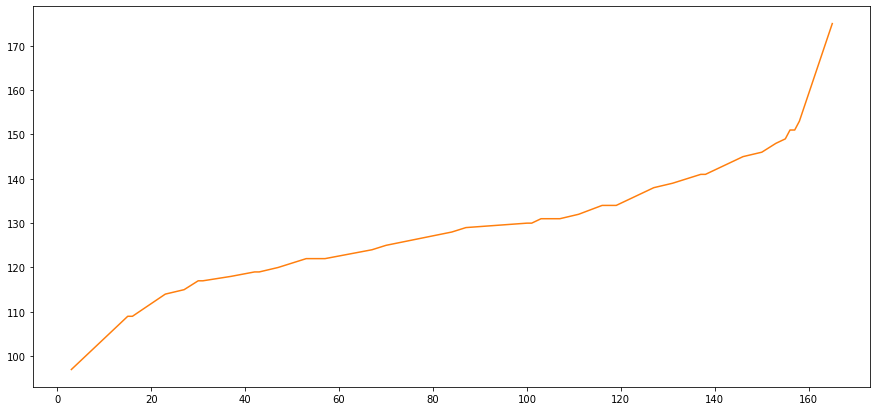

In [42]:
fig=plt.figure(figsize=(15,7))
plt.plot(TestDF['MeanDiff'])
plt.plot(TestDF['y_test'])

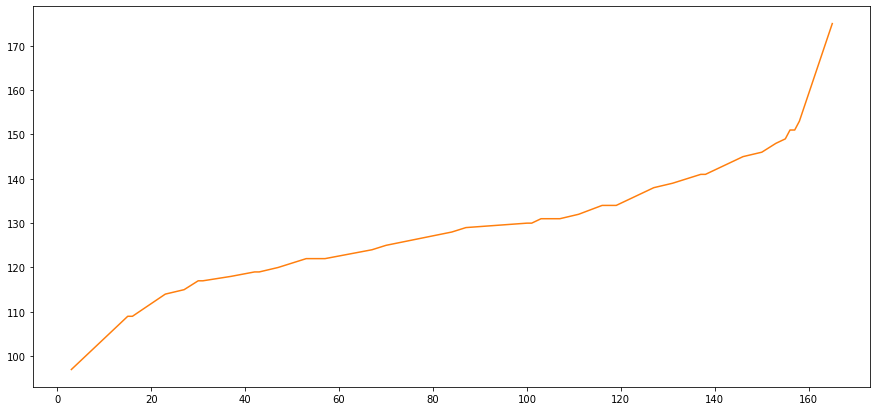

In [43]:
fig=plt.figure(figsize=(15,7))
plt.plot(TestDF['MeanDiff_abs'])
plt.plot(TestDF['y_test'])

In [44]:
TestDF.to_csv('Test_user_predictions_abs.csv')

PermissionError: [Errno 13] Permission denied: 'Test_user_predictions_abs.csv'

In [ ]:
plt.plot()

In [ ]:
TrainDF

In [ ]:
from sklearn import metrics
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

scores = pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAPE_Train','MAE_Test','MSE_Test','RMSE_Test','MAPE_Test'])

def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    MAE_Train = metrics.mean_absolute_error(train_act,train_pred)
    MSE_Train = metrics.mean_squared_error(train_act,train_pred)
    RMSE_Train = np.sqrt(metrics.mean_squared_error(train_act,train_pred))
    MAPE_Train = mean_absolute_percentage_error(train_act,train_pred)
    MAE_Test = metrics.mean_absolute_error(test_act,test_pred)
    MSE_Test = metrics.mean_squared_error(test_act,test_pred)
    RMSE_Test = np.sqrt(metrics.mean_squared_error(test_act,test_pred))
    MAPE_Test = mean_absolute_percentage_error(test_act,test_pred)
    dataframe = dataframe.append(pd.Series([model_description,MAE_Train,MSE_Train,RMSE_Train,MAPE_Train,MAE_Test,MSE_Test,RMSE_Test,MAPE_Test],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [ ]:
scores = get_metrics(y_train,y_train_pred,y_test,y_pred,"ANN",scores)
scores = get_metrics(TrainDF['y_train'],TrainDF['y_train_pred_mean'],TestDF['y_test'],TestDF['y_pred_mean'],"MEAN_PRED",scores)
scores = get_metrics(TrainDF['y_train'],TrainDF['y_train_pred_max'],TestDF['y_test'],TestDF['y_pred_max'],"MAX_PRED",scores)
scores = get_metrics(TrainDF['y_train'],TrainDF['y_train_pred_min'],TestDF['y_test'],TestDF['y_pred_min'],"MIN_PRED",scores)
scores

## NMAE Computation for Windows

In [ ]:
NMAE = pd.DataFrame(columns=['Windows_NMAE_Train','Windows_NMAE_Test','User_NMAE_Train','User_NMAE_Test'])

def NMAE_Comp(trainwindowspred,testwindowspred,trainuserpred,testuserpred,dataframe):
    TWE1=abs(trainwindowspred['y_train']-trainwindowspred['y_train_pred']).mean()
    TWE2=abs(trainwindowspred['y_train']-trainwindowspred['Avg_SBP']).mean()
    TWP=1-TWE1/TWE2
    WE1=abs(testwindowspred['y_test']-testwindowspred['y_pred']).mean()
    WE2=abs(testwindowspred['y_test']-testwindowspred['Avg_SBP']).mean()
    WP=1-WE1/WE2
    TUE1=abs(trainuserpred['y_train']-trainuserpred['y_train_pred_mean']).mean()
    TUE2=abs(trainuserpred['y_train']-trainuserpred['Avg_SBP']).mean()
    TUE=1-TUE1/TUE2
    UE1=abs(testuserpred['y_test']-testuserpred['y_pred_mean']).mean()
    UE2=abs(testuserpred['y_test']-testuserpred['Avg_SBP']).mean()
    UE=1-UE1/UE2
    dataframe=dataframe.append(pd.Series([TWP,WP,TUE,UE],index=NMAE.columns ), ignore_index=True)
    return(dataframe)

In [ ]:
NMAE = NMAE_Comp(Train_pred_df,pred_df,TrainDF,TestDF,NMAE)
NMAE

In [ ]:
# keras library import  for Saving and loading model and weights

from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("2.class_im.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("2.class_im.h5")

In [ ]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model

# load json and create model
json_file = open('2.class_im.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("2.class_im.h5")
print("Loaded model from disk")

loaded_model.save('2.class_im.hdf5')
loaded_model=load_model('2.class_im.hdf5')